# Lab Exercise 03: Exploring Wavenumbers and Spatial Sampling in Temperature Measurements

## Objective:
In this exercise, you will simulate measuring temperature across a field and explore how the spacing between sensors affects your ability to detect spatial features. You will calculate the fundamental wavenumber and Nyquist wavenumber and observe how changing the sensor spacing impacts your measurements.

**Answer** this notebook by updating the **Answers for Part. x** cell by **double clicking and typing your answers in a cell**. After finishing this notebook, upload in your github repository (**meteo203-2425-lastname/exercises/exercise_03_wavenumbers.ipynb**)

---
## Part 1: Simulating Temperature Across a Field

Task: Simulate a temperature field that varies across a 100-meter-wide field. Assume that the temperature varies in a sinusoidal manner across the field.

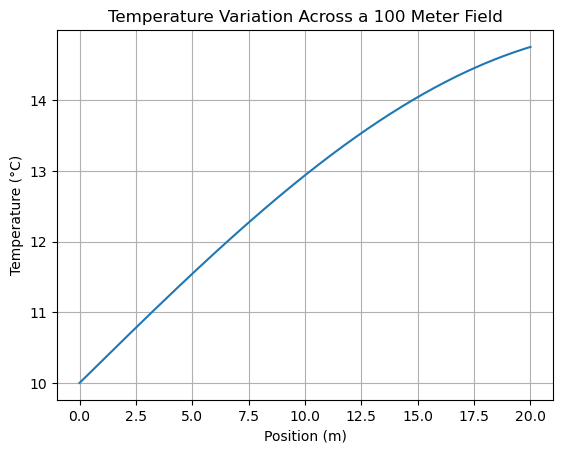

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the length of the field
L = 20 # in meters

# Define the wavelength of the temperature wave (e.g., temperature changes every 20 meters)
wavelength = 100  # meters
k = 2 * np.pi / wavelength  # wavenumber

# Generate positions across the field (fine resolution)
x_fine = np.linspace(0, L, 1000)  # 1000 points across the field

# Generate the temperature variation across the field
temperature = 10 + 5 * np.sin(k * x_fine)  # Sinusoidal temperature wave

# Plot the temperature variation
plt.plot(x_fine, temperature)
plt.title("Temperature Variation Across a 100 Meter Field")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


### Questions:

What does the wavelength represent in this context? How often does the temperature change across the field?

## Answer:
1. The temperature is shown to rise the further the position is across the field

---
## Part 2: Exploring Sensor Spacing

Now, we’ll simulate measuring the temperature using sensors placed at regular intervals across the field.

Task: Change the sensor spacing and observe how well you can capture the temperature wave.

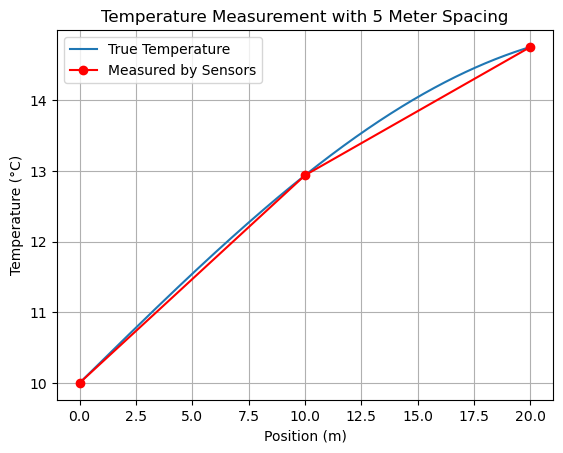

In [8]:
# Define the sensor spacing (e.g., 5 meters)
sensor_spacing = 10  # meters

# Generate positions where the sensors are placed
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)  # Sensor positions

# Measure the temperature at the sensor positions
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the temperature measured by the sensors
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label = "Measured by Sensors", color='r')
plt.title("Temperature Measurement with 5 Meter Spacing")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


### Questions:

1. How well does the sensor-based measurement (red line) match the true temperature variation?
2. What would happen if the spacing between the sensors was larger? Change the sensor spacing to 10 meters and re-run the code.

## Answer:
1. There are some variation when it reached the 10m position, which became a bit more prominent in the 15m position. However, stayed much similar
3. The deviation is more pronounced especially when it reached the 10m mark.

---
## Part 3: Calculating Fundamental and Nyquist Wavenumbers

Task: Calculate the fundamental wavenumber and Nyquist wavenumber for the given scenario.

- The fundamental wavenumber represents the longest wave (or temperature trend) that spans the entire field.
- The Nyquist wavenumber represents the shortest wave that can be detected by your sensors.

In [14]:
# Calculate the fundamental wavenumber
L =  10 # Length of the field in meters
k_0 = 2 * np.pi / L  # Fundamental wavenumber

# Calculate the Nyquist wavenumber based on sensor spacing
k_n = np.pi / 10  # Nyquist wavenumber

# Print the results
print(f"Fundamental Wavenumber: {k_0:.3f} radians/m")
print(f"Nyquist Wavenumber (with {10}m spacing): {k_n:.3f} radians/m")


Fundamental Wavenumber: 0.628 radians/m
Nyquist Wavenumber (with 10m spacing): 0.314 radians/m


### Questions:

1. What is the fundamental wavenumber? What does this tell you about the largest feature (or longest wave) you can detect in the field?
2. What is the Nyquist wavenumber for 5-meter spacing? What about for 10-meter spacing? How does increasing the sensor spacing affect your ability to detect smaller features?

## Answer:
1. This shows that the fundamental wavenumber contains the raw and unfiltered data, which has a measurement of 0.628 radians/m
2. The Nyquist wavenumber at 5m spacing and an L=5 showed an equal measurement. However with the 10m spacing, the Nyquist wavenumber only recorded a 0.314 radians/m, significantly smaller than the Fundamental wavenumber.

---
### Part 4: Aliasing and Sampling Resolution

When the sensor spacing becomes too large, we may not be able to detect certain temperature variations correctly due to aliasing. Let's explore this concept.

Task: Increase the sensor spacing to 15 meters and observe the effect.

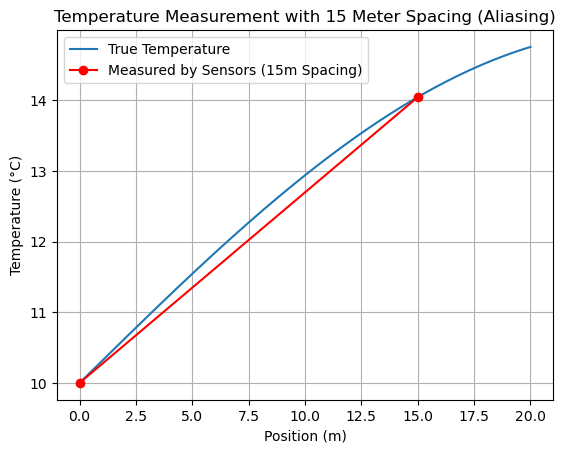

In [15]:
# Increase the sensor spacing to 15 meters
sensor_spacing = 15 # meters
x_sensors = np.arange(0, L + sensor_spacing, sensor_spacing)
temperature_sensors = 10 + 5 * np.sin(k * x_sensors)

# Plot the result
plt.plot(x_fine, temperature, label="True Temperature")
plt.plot(x_sensors, temperature_sensors, 'o-', label="Measured by Sensors (15m Spacing)", color='r')
plt.title("Temperature Measurement with 15 Meter Spacing (Aliasing)")
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


### Questions:

1. What happens to the accuracy of your temperature measurements when the sensor spacing is increased to 15 meters?
2. Explain aliasing in this context. Why does it occur when the sensor spacing exceeds a certain limit?

## Answer
1. The discrepancy between the 2 measurements increased.
2. This is because the aliasing basically only includes smaller data, therefore making the sensor spacing measurement more variable than the true temperature measurement.

### Final Questions

1. How does sensor spacing affect your ability to resolve both large-scale and small-scale temperature changes across the field?
2. How do the fundamental wavenumber and Nyquist wavenumber help you determine the types of temperature variations you can detect?
3. Why is it important to consider both the spatial resolution (sensor spacing) and the wavenumbers when designing a measurement system for temperature or other physical parameters?

## Answer:
1. Sensor spacing basically affects how nuanced the data gathered can be. The smaller the distance of each sensor is, the more accurate measurement it can capture as more sensors can capture more data points.
2. The fundamental wavenumber basically states the most accurate data point while the nyquist wavenumber shows how the data may deviate depending on how large the variablity is present in the data. Therefore, there is a "sweet spot" for the most optimal/efficient amount of data that could accurately capture the data pattern.
3. This is because the sensor spacing determines how many the data can be. The wavenumber then tells its accuracy. Balancing the two factors (determinig how many and how small) will determine how large and accurate the outcome of the data will be.